# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [5]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


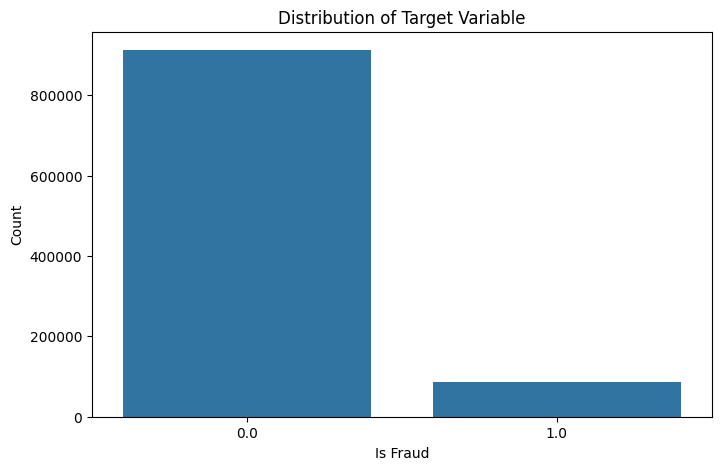

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the target variable
target_distribution = fraud['fraud'].value_counts(normalize=True)
print(target_distribution)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='fraud', data=fraud)
plt.title('Distribution of Target Variable')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the data
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [11]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))


Confusion Matrix:
[[271936   1843]
 [ 10433  15788]]

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.96      0.99      0.98    273779
       Fraud       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



In [12]:
from sklearn.utils import resample

# Combine the training data back into a single DataFrame
train_data = pd.DataFrame(X_train)
train_data['is_fraud'] = y_train

# Separate majority and minority classes
majority = train_data[train_data['is_fraud'] == 0]
minority = train_data[train_data['is_fraud'] == 1]

# Upsample minority class
minority_upsampled = resample(minority, 
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42) # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

# Split the upsampled data into X and y
X_train_upsampled = upsampled.drop('is_fraud', axis=1)
y_train_upsampled = upsampled['is_fraud']

# Train the model again
model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate the model
y_pred_upsampled = model.predict(X_test)

print("\nUpsampled Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_upsampled))

print("\nUpsampled Classification Report:")
print(classification_report(y_test, y_pred_upsampled, target_names=['Not Fraud', 'Fraud']))



Upsampled Confusion Matrix:
[[255513  18266]
 [  1360  24861]]

Upsampled Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.99      0.93      0.96    273779
       Fraud       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



In [13]:
# Undersample majority class
majority_downsampled = resample(majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority),     # to match minority class
                                 random_state=42) # reproducible results

# Combine minority class with downsampled majority class
downsampled = pd.concat([majority_downsampled, minority])

# Split the downsampled data into X and y
X_train_downsampled = downsampled.drop('is_fraud', axis=1)
y_train_downsampled = downsampled['is_fraud']

# Train the model again
model.fit(X_train_downsampled, y_train_downsampled)

# Evaluate the model
y_pred_downsampled = model.predict(X_test)

print("\nDownsampled Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_downsampled))

print("\nDownsampled Classification Report:")
print(classification_report(y_test, y_pred_downsampled, target_names=['Not Fraud', 'Fraud']))



Downsampled Confusion Matrix:
[[255529  18250]
 [  1327  24894]]

Downsampled Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.99      0.93      0.96    273779
       Fraud       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



In [14]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model again
model.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_smote = model.predict(X_test)

print("\nSMOTE Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))

print("\nSMOTE Classification Report:")
print(classification_report(y_test, y_pred_smote, target_names=['Not Fraud', 'Fraud']))



SMOTE Confusion Matrix:
[[255665  18114]
 [  1401  24820]]

SMOTE Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.99      0.93      0.96    273779
       Fraud       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

